In [14]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pickle
import matplotlib.patches as mpatches
import set_style
import combo_data

set_style.set_style()


def open_file(filename) -> object:
    with open(f"{filename}", "rb") as handle:
        return pickle.load(handle)

#Read all data
true = open_file("true_params.pkl")
self = open_file("self_params.pkl")
hyp1_f = open_file("hyp1-feedback/hyp1_feedback64.pkl")
hyp2_f = open_file("hyp2-feedback/hyp2_feedback64.pkl")
hyp3_f = open_file("hyp3-feedback/hyp3_feedback.pkl")

hyp1_nf = open_file("hyp1-nofeedback/hyp1_nofeedback.pkl")
hyp2_nf = open_file("hyp2-nofeedback/hyp2_nofeedback.pkl")
hyp3_nf = open_file("hyp3-nofeedback/hyp3_nofeedback.pkl")

hyp1_nc1_f = open_file("/Users/aakritikumar/Desktop/Lab/ToM-pycharm/combo1/hyp1-feedback/hyp1_feedback64.pkl")
hyp2_nc1_f = open_file("combo1/hyp2-feedback/hyp2_feedback64.pkl")
hyp3_nc1_f = open_file("combo1/hyp3-feedback/hyp3_feedback.pkl")

hyp1_nc1_nf = open_file("/Users/aakritikumar/Desktop/Lab/ToM-pycharm/combo1/hyp1-nofeedback/hyp1_nofeedback.pkl")
hyp2_nc1_nf = open_file("combo1/hyp2-nofeedback/hyp2_nofeedback.pkl")
hyp3_nc1_nf = open_file("combo1/hyp3-nofeedback/hyp3_nofeedback.pkl")

hyp1_nc2_f = open_file("/Users/aakritikumar/Desktop/Lab/ToM-pycharm/combo2/hyp1-feedback/hyp1_feedback64.pkl")
hyp2_nc2_f = open_file("combo2/hyp2-feedback/hyp2_feedback64.pkl")
hyp3_nc2_f = open_file("combo2/hyp3-feedback/hyp3_feedback.pkl")

hyp1_nc2_nf = open_file("/Users/aakritikumar/Desktop/Lab/ToM-pycharm/combo2/hyp1-nofeedback/hyp1_nofeedback.pkl")
hyp2_nc2_nf = open_file("combo2/hyp2-nofeedback/hyp2_nofeedback.pkl")
hyp3_nc2_nf = open_file("combo2/hyp3-nofeedback/hyp3_nofeedback.pkl")


#for mean true scores on plots
df = pd.read_csv("Exp2_Estimation.csv")
actcorrectothermean_top = df[(df['otherworkerperf'] == 'Top') & (df.conditionshowFeedback == 1)].actCorrectOther.mean()
actcorrectothermean_bottom = df[
    (df['otherworkerperf'] == 'Bottom') & (df.conditionshowFeedback == 1)].actCorrectOther.mean()

actcorrectothermean_top_nfb = df[
    (df['otherworkerperf'] == 'Top') & (df.conditionshowFeedback == 0)].actCorrectOther.mean()
actcorrectothermean_bottom_nfb = df[
    (df['otherworkerperf'] == 'Bottom') & (df.conditionshowFeedback == 0)].actCorrectOther.mean()

#labels of top and bottom performers
df = df[df.conditionshowFeedback == 1]
idx = df.uid.unique() - 1
top = df[(df.otherworkerperf == 'Top')].uid.unique() - 1
bottom = df[(df.otherworkerperf == 'Bottom')].uid.unique() - 1
df = df.sort_values(['uid'], ascending=[True], kind="mergesort")
df = df.drop_duplicates(subset=['uid'])
labels_TB = df.otherworkerperf.reset_index()['otherworkerperf']

In [16]:
labels_TB_c1 = [labels_TB[i] for i in combo_data.combo1_other_id.astype(int)]
labels_TB_c2 = [labels_TB[i] for i in combo_data.combo2_other_id.astype(int)]

In [18]:
def makedf_hyp1(df, df_nc1, df_nc2, labels_TB_c1, labels_TB_c2):
    df_simdata_hyp1 = pd.DataFrame()
    df_simdata_hyp1['User_ID'] = np.repeat(np.linspace(1, 64 * 3, 64 * 3), 16)
    # Add block numbers
    blocks = np.linspace(1, 16, 16)
    df_simdata_hyp1['Blocks'] = 0
    for i in range(192):
        df_simdata_hyp1['Blocks'][i * 16:(i + 1) * 16] = blocks

    df_simdata_hyp1 = df_simdata_hyp1.astype(int)

    # Add self scores
    df_simdata_hyp1['SelfScore'] = 0
    df_simdata_hyp1['SelfScore'][:(64 * 16)] = self['Sim_Y'][idx].flatten()
    df_simdata_hyp1['SelfScore'][(64 * 16):(64 * 16 * 2)] = self['Sim_Y'][idx].flatten()
    df_simdata_hyp1['SelfScore'][(64 * 16 * 2):(64 * 16 * 3)] = self['Sim_Y'][idx].flatten()

    # Add other score
    df_simdata_hyp1['OtherScore'] = 0
    df_simdata_hyp1['OtherScore'][:(64 * 16)] = df['Sim_OtherEst'].flatten()
    df_simdata_hyp1['OtherScore'][(64 * 16):(64 * 16 * 2)] = df_nc1['Sim_OtherEst'].flatten()
    df_simdata_hyp1['OtherScore'][(64 * 16 * 2):(64 * 16 * 3)] = df_nc2['Sim_OtherEst'].flatten()

    # Add top bottom label
    df_simdata_hyp1['TBlabel'] = 0
    df_simdata_hyp1['TBlabel'][:(64 * 16)] = np.repeat(labels_TB, 16)
    df_simdata_hyp1['TBlabel'][(64 * 16):(64 * 16 * 2)] = np.repeat(labels_TB_c1, 16)
    df_simdata_hyp1['TBlabel'][(64 * 16 * 2):(64 * 16 * 3)] = np.repeat(labels_TB_c2, 16)
    return df_simdata_hyp1


def makedf_hyp2(df, df_nc1, df_nc2, labels_TB_c1, labels_TB_c2):
    df_simdata_hyp1 = pd.DataFrame()
    df_simdata_hyp1['User_ID'] = np.repeat(np.linspace(1, 64 * 3, 64 * 3), 16)
    # Add block numbers
    blocks = np.linspace(1, 16, 16)
    df_simdata_hyp1['Blocks'] = 0
    for i in range(192):
        df_simdata_hyp1['Blocks'][i * 16:(i + 1) * 16] = blocks

    df_simdata_hyp1 = df_simdata_hyp1.astype(int)

    # Add self scores
    df_simdata_hyp1['SelfScore'] = 0
    df_simdata_hyp1['SelfScore'][:(64 * 16)] = self['Sim_Y'][idx].flatten()
    df_simdata_hyp1['SelfScore'][(64 * 16):(64 * 16 * 2)] = self['Sim_Y'][idx].flatten()
    df_simdata_hyp1['SelfScore'][(64 * 16 * 2):(64 * 16 * 3)] = self['Sim_Y'][idx].flatten()

    # Add other score
    df_simdata_hyp1['OtherScore'] = 0
    df_simdata_hyp1['OtherScore'][:(64 * 16)] = df['Sim_OtherEst'].flatten()
    df_simdata_hyp1['OtherScore'][(64 * 16):(64 * 16 * 2)] = df_nc1['Sim_OtherEst'].flatten()
    df_simdata_hyp1['OtherScore'][(64 * 16 * 2):(64 * 16 * 3)] = df_nc2['Sim_OtherEst'].flatten()

    # Add top bottom label
    df_simdata_hyp1['TBlabel'] = 0
    df_simdata_hyp1['TBlabel'][:(64 * 16)] = np.repeat(labels_TB, 16)
    df_simdata_hyp1['TBlabel'][(64 * 16):(64 * 16 * 2)] = np.repeat(labels_TB_c1, 16)
    df_simdata_hyp1['TBlabel'][(64 * 16 * 2):(64 * 16 * 3)] = np.repeat(labels_TB_c2, 16)
    return df_simdata_hyp1


def makedf_hyp3(df, df_nc1, df_nc2, labels_TB_c1, labels_TB_c2):
    df_simdata_hyp1 = pd.DataFrame()
    df_simdata_hyp1['User_ID'] = np.repeat(np.linspace(1, 64 * 3, 64 * 3), 16)
    # Add block numbers
    blocks = np.linspace(1, 16, 16)
    df_simdata_hyp1['Blocks'] = 0
    for i in range(192):
        df_simdata_hyp1['Blocks'][i * 16:(i + 1) * 16] = blocks

    df_simdata_hyp1 = df_simdata_hyp1.astype(int)

    # Add self scores
    df_simdata_hyp1['SelfScore'] = 0
    df_simdata_hyp1['SelfScore'][:(64 * 16)] = self['Sim_Y'][idx].flatten()
    df_simdata_hyp1['SelfScore'][(64 * 16):(64 * 16 * 2)] = self['Sim_Y'][idx].flatten()
    df_simdata_hyp1['SelfScore'][(64 * 16 * 2):(64 * 16 * 3)] = self['Sim_Y'][idx].flatten()

    # Add other score
    df_simdata_hyp1['OtherScore'] = 0
    df_simdata_hyp1['OtherScore'][:(64 * 16)] = df['Sim_OtherEst'].flatten()
    df_simdata_hyp1['OtherScore'][(64 * 16):(64 * 16 * 2)] = df_nc1['Sim_OtherEst'].flatten()
    df_simdata_hyp1['OtherScore'][(64 * 16 * 2):(64 * 16 * 3)] = df_nc2['Sim_OtherEst'].flatten()

    # Add top bottom label
    df_simdata_hyp1['TBlabel'] = 0
    df_simdata_hyp1['TBlabel'][:(64 * 16)] = np.repeat(labels_TB, 16)
    df_simdata_hyp1['TBlabel'][(64 * 16):(64 * 16 * 2)] = np.repeat(labels_TB_c1, 16)
    df_simdata_hyp1['TBlabel'][(64 * 16 * 2):(64 * 16 * 3)] = np.repeat(labels_TB_c2, 16)
    return df_simdata_hyp1

<ipython-input-18-d9e5d648c5b0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simdata_hyp1['Blocks'][i * 16:(i + 1) * 16] = blocks
/Users/aakritikumar/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-18-d9e5d648c5b0>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simdata_hyp1['SelfScore'][(64 * 16):(64 *

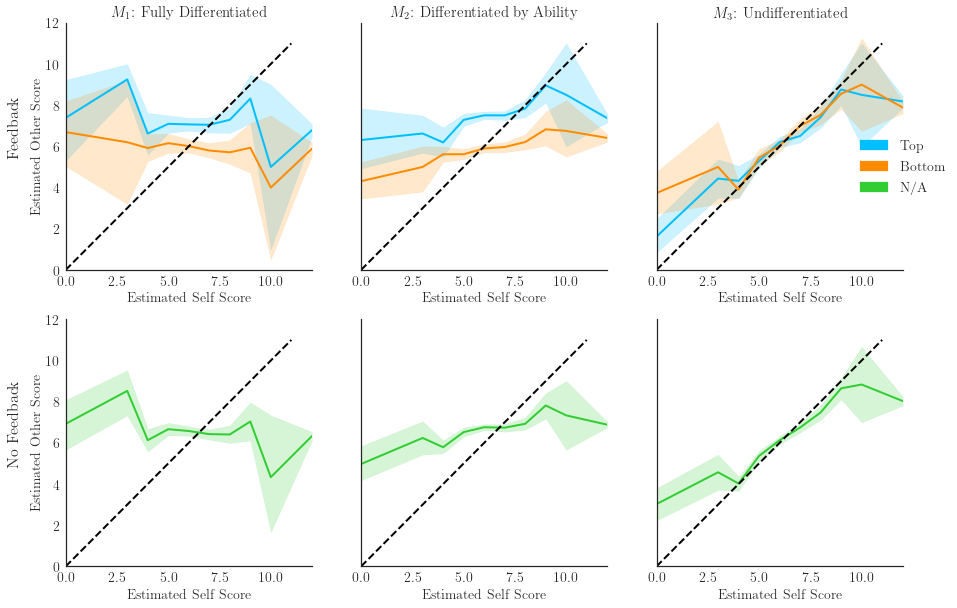

In [27]:
df_simdata_hyp1 = makedf_hyp1(hyp1_f, hyp1_nc1_f, hyp1_nc2_f, labels_TB_c1, labels_TB_c2)
df_simdata_hyp2 = makedf_hyp2(hyp2_f, hyp2_nc1_f, hyp2_nc2_f, labels_TB_c1, labels_TB_c2)
df_simdata_hyp3 = makedf_hyp2(hyp3_f, hyp3_nc1_f, hyp3_nc2_f, labels_TB_c1, labels_TB_c2)

df_simdata_hyp1nf = makedf_hyp1(hyp1_nf, hyp1_nc1_nf, hyp1_nc2_nf, labels_TB_c1, labels_TB_c2)
df_simdata_hyp2nf = makedf_hyp2(hyp2_nf, hyp2_nc1_nf, hyp2_nc2_nf, labels_TB_c1, labels_TB_c2)
df_simdata_hyp3nf = makedf_hyp2(hyp3_nf, hyp3_nc1_nf, hyp3_nc2_nf, labels_TB_c1, labels_TB_c2)

x = range(12)
y = range(12)
plt.rc('text', usetex=True)
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharey=True)
sns.lineplot(data=df_simdata_hyp1[df_simdata_hyp1['TBlabel'] == 'Top'], x="SelfScore", y="OtherScore", ax=ax[0, 0],
             linewidth=2, color='deepskyblue')
sns.lineplot(data=df_simdata_hyp2[df_simdata_hyp2['TBlabel'] == 'Top'], x="SelfScore", y="OtherScore", ax=ax[0, 1],
             linewidth=2, color='deepskyblue')
sns.lineplot(data=df_simdata_hyp3[df_simdata_hyp3['TBlabel'] == 'Top'], x="SelfScore", y="OtherScore", ax=ax[0, 2],
             linewidth=2, color='deepskyblue')



# sns.lineplot(data = data_hyp_top, x = "estself", y = "estother_hyp3", ax = ax[0,2], linewidth = 2, color = 'deepskyblue')

sns.lineplot(data=df_simdata_hyp1[df_simdata_hyp1['TBlabel'] == 'Bottom'], x="SelfScore", y="OtherScore", ax=ax[0, 0],
             linewidth=2, color='darkorange')
sns.lineplot(data=df_simdata_hyp2[df_simdata_hyp2['TBlabel'] == 'Bottom'], x="SelfScore", y="OtherScore", ax=ax[0, 1],
             linewidth=2, color='darkorange')
sns.lineplot(data=df_simdata_hyp3[df_simdata_hyp3['TBlabel'] == 'Bottom'], x="SelfScore", y="OtherScore", ax=ax[0, 2],
             linewidth=2, color='darkorange')

sns.lineplot(data=df_simdata_hyp1nf, x="SelfScore", y="OtherScore",
             ax=ax[1, 0], linewidth=2, color='limegreen')
sns.lineplot(data=df_simdata_hyp2nf, x="SelfScore", y="OtherScore",
             ax=ax[1, 1], linewidth=2, color='limegreen')
sns.lineplot(data=df_simdata_hyp3nf, x="SelfScore", y="OtherScore",
             ax=ax[1, 2], linewidth=2, color='limegreen')

# sns.lineplot(data = data_hyp_bottom, x = "estself", y = "estother_hyp3", ax = ax[0,2], linewidth = 2, color = 'darkorange')

# sns.lineplot(data = data_hyp_nfb, x = "estself", y = "estother_hyp1", ax = ax[1,0], color = 'limegreen')
# sns.lineplot(data = data_hyp_nfb, x = "estself", y = "estother_hyp2", ax = ax[1,1], color = 'limegreen')
# sns.lineplot(data = data_hyp_nfb, x = "estself", y = "estother_hyp3", ax = ax[1,2], color = 'limegreen')

ax[0, 0].set_ylabel("Estimated Other Score", fontsize=14)
ax[1, 0].set_ylabel("Estimated Other Score", fontsize=14)

ax[0, 0].set_title(r"$M_1$: Fully Differentiated", fontsize=15)
ax[0, 1].set_title(r"$M_2$: Differentiated by Ability", fontsize=15)
ax[0, 2].set_title(r"$M_3$: Undifferentiated", fontsize=15)

for i in range(2):
    for j in range(3):
        ax[i, j].spines['right'].set_visible(False)
        ax[i, j].spines['top'].set_visible(False)
        ax[i, j].set_ylim(0, 12)
        ax[i, j].set_xlim(0, 12)
        ax[i, j].set_xlabel("Estimated Self Score", fontsize=14)

for row in ax:
    for col in row:
        col.plot(x, y, c='k', linestyle='dashed')

blue = mpatches.Patch(color='deepskyblue', label='Top')
orange = mpatches.Patch(color='darkorange', label='Bottom')
green = mpatches.Patch(color='limegreen', label='N/A')
fig.legend(handles=[blue, orange, green], bbox_to_anchor=(.9, .68), loc="center", borderaxespad=0., frameon=False,
           fontsize=14)

ax[0, 0].text(-.18, .7, 'Feedback', transform=ax[0, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='right',
              rotation=90)
ax[1, 0].text(-.18, .75, 'No Feedback', transform=ax[1, 0].transAxes, fontsize=16, fontweight='bold', va='top',
              ha='right', rotation=90)

plt.plot()
fig.savefig("/Users/aakritikumar/Desktop/Lab/ToM-pycharm/fig6.pdf", bbox_inches='tight')

In [26]:
df_simdata_hyp1nf

,User_ID,Blocks,SelfScore,OtherScore,TBlabel
0,1,1,7.0,9.0,Bottom
1,1,2,7.0,7.0,Bottom
2,1,3,6.0,12.0,Bottom
3,1,4,7.0,2.0,Bottom
4,1,5,12.0,12.0,Bottom
...,...,...,...,...,...
3067,192,12,7.0,5.0,Bottom
3068,192,13,7.0,12.0,Bottom
3069,192,14,7.0,2.0,Bottom
3070,192,15,7.0,0.0,Bottom


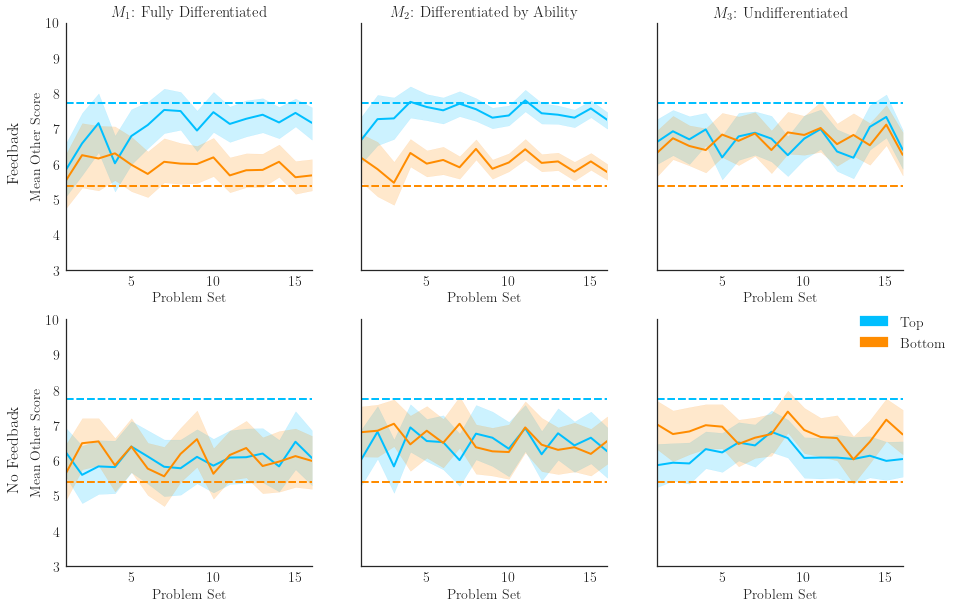

In [29]:
x = range(12)
y = range(12)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharey=True)
sns.lineplot(data=df_simdata_hyp1[df_simdata_hyp1['TBlabel'] == 'Top'], x="Blocks", y="OtherScore", ax=ax[0, 0],
             linewidth=2, color='deepskyblue')
sns.lineplot(data=df_simdata_hyp2[df_simdata_hyp2['TBlabel'] == 'Top'], x="Blocks", y="OtherScore", ax=ax[0, 1],
             linewidth=2, color='deepskyblue')
sns.lineplot(data=df_simdata_hyp3[df_simdata_hyp3['TBlabel'] == 'Top'], x="Blocks", y="OtherScore", ax=ax[0, 2],
             linewidth=2, color='deepskyblue')

sns.lineplot(data=df_simdata_hyp1nf[df_simdata_hyp1nf['TBlabel'] == 'Top'], x="Blocks", y="OtherScore", ax=ax[1, 0],
             linewidth=2, color='deepskyblue')
sns.lineplot(data=df_simdata_hyp2nf[df_simdata_hyp2nf['TBlabel'] == 'Top'], x="Blocks", y="OtherScore", ax=ax[1, 1],
             linewidth=2, color='deepskyblue')
sns.lineplot(data=df_simdata_hyp3nf[df_simdata_hyp3nf['TBlabel'] == 'Top'], x="Blocks", y="OtherScore", ax=ax[1, 2],
             linewidth=2, color='deepskyblue')

sns.lineplot(data=df_simdata_hyp1[df_simdata_hyp1['TBlabel'] == 'Bottom'], x="Blocks", y="OtherScore", ax=ax[0, 0],
             linewidth=2, color='darkorange')
sns.lineplot(data=df_simdata_hyp2[df_simdata_hyp2['TBlabel'] == 'Bottom'], x="Blocks", y="OtherScore", ax=ax[0, 1],
             linewidth=2, color='darkorange')
sns.lineplot(data=df_simdata_hyp3[df_simdata_hyp3['TBlabel'] == 'Bottom'], x="Blocks", y="OtherScore", ax=ax[0, 2],
             linewidth=2, color='darkorange')

sns.lineplot(data=df_simdata_hyp1nf[df_simdata_hyp1nf['TBlabel'] == 'Bottom'], x="Blocks", y="OtherScore", ax=ax[1, 0],
             linewidth=2, color='darkorange')
sns.lineplot(data=df_simdata_hyp2nf[df_simdata_hyp2nf['TBlabel'] == 'Bottom'], x="Blocks", y="OtherScore", ax=ax[1, 1],
             linewidth=2, color='darkorange')
sns.lineplot(data=df_simdata_hyp3nf[df_simdata_hyp3nf['TBlabel'] == 'Bottom'], x="Blocks", y="OtherScore", ax=ax[1, 2],
             linewidth=2, color='darkorange')

ax[0, 0].set_ylabel("Mean Other Score", fontsize=14)
ax[1, 0].set_ylabel("Mean Other Score", fontsize=14)

ax[0, 0].set_title(r"$M_1$: Fully Differentiated", fontsize=15)
ax[0, 1].set_title(r"$M_2$: Differentiated by Ability", fontsize=15)
ax[0, 2].set_title(r"$M_3$: Undifferentiated", fontsize=15)

for i in range(2):
    for j in range(3):
        ax[i, j].spines['right'].set_visible(False)
        ax[i, j].spines['top'].set_visible(False)
        ax[i, j].set_ylim(3, 10)
        ax[i, j].set_xlim(1, 16)
        ax[i, j].set_xlabel("Problem Set", fontsize=14)
        ax[0, j].axhline(actcorrectothermean_top, linestyle='dashed', color='deepskyblue')
        ax[0, j].axhline(actcorrectothermean_bottom, linestyle='dashed', color='darkorange')
        ax[1, j].axhline(actcorrectothermean_top_nfb, linestyle='dashed', color='deepskyblue')
        ax[1, j].axhline(actcorrectothermean_bottom_nfb, linestyle='dashed', color='darkorange')

blue = mpatches.Patch(color='deepskyblue', label='Top')
orange = mpatches.Patch(color='darkorange', label='Bottom')
# green= mpatches.Patch(color='limegreen', label='N/A')
fig.legend(handles=[blue, orange], bbox_to_anchor=(.9, .45), loc="center", borderaxespad=0., frameon=False, fontsize=14)

ax[0, 0].text(-.18, .6, 'Feedback', transform=ax[0, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='right',
              rotation=90)
ax[1, 0].text(-.18, .65, 'No Feedback', transform=ax[1, 0].transAxes, fontsize=16, fontweight='bold', va='top',
              ha='right', rotation=90)

plt.plot()
fig.savefig("/Users/aakritikumar/Desktop/Lab/ToM-pycharm/fig7.pdf", bbox_inches='tight')

In [30]:
df = pd.read_csv("Exp2_Estimation.csv")
df_feedback = df[df.conditionshowFeedback == 1]
df_self = df_feedback[['uid', 'estCorrectSelf', 'idSet']]
df_self = df_self.sort_values(['uid'], ascending=[True], kind="mergesort")
df_self = df_self[['uid', 'estCorrectSelf', 'idSet']]


In [33]:
df_other = df[['uid', 'estCorrectOther', 'actCorrectOther', 'idSet']]
df_other = df_other.sort_values(['uid', 'idSet'], ascending=[True, True], kind="mergesort")


In [34]:
df_other

,uid,estCorrectOther,actCorrectOther,idSet
12,1,3.0,2,1
14,1,3.0,4,2
15,1,3.0,4,3
13,1,4.0,8,4
8,1,4.0,2,5
...,...,...,...,...
2039,128,6.0,4,12
2041,128,6.0,2,13
2043,128,7.0,8,14
2042,128,6.0,7,15
